<a href="https://colab.research.google.com/github/issacridhin/Reinforcement_learning/blob/main/2348546_Lab9_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implement temporal-difference learning in a simulated environment**

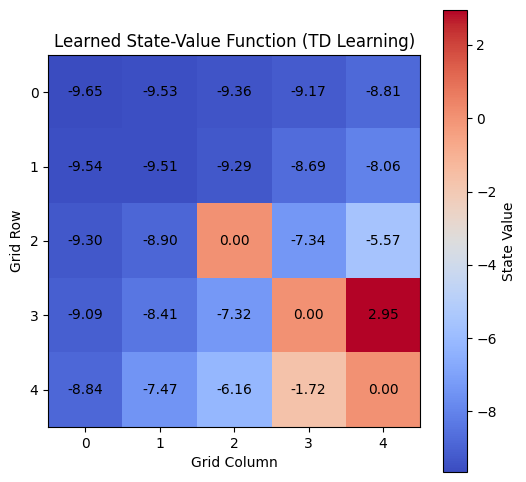

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D grid-world environment
class GridWorld:
    def __init__(self, grid_size=(5, 5), start=(0, 0), goal=(4, 4), obstacles=[]):
        self.grid_size = grid_size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_position = self.start
        return self.agent_position

    def step(self, action):
        x, y = self.agent_position
        if action == "up":
            new_position = (x - 1, y)
        elif action == "down":
            new_position = (x + 1, y)
        elif action == "left":
            new_position = (x, y - 1)
        elif action == "right":
            new_position = (x, y + 1)
        else:
            raise ValueError("Invalid action")

        # Check boundaries
        new_position = (
            max(0, min(self.grid_size[0] - 1, new_position[0])),
            max(0, min(self.grid_size[1] - 1, new_position[1])),
        )

        # Check obstacles
        if new_position in self.obstacles:
            new_position = self.agent_position  # No movement into obstacles

        # Update position
        self.agent_position = new_position

        # Check terminal condition
        if new_position == self.goal:
            return new_position, 10, True  # Reward of 10 at the goal
        return new_position, -1, False  # Step cost of -1 otherwise

# TD Learning Algorithm
def td_learning(grid, episodes=500, alpha=0.1, gamma=0.9):
    state_values = np.zeros(grid.grid_size)  # Initialize state values to 0
    actions = ["up", "down", "left", "right"]

    for episode in range(episodes):
        state = grid.reset()
        done = False
        while not done:
            # Choose an action randomly
            action = np.random.choice(actions)
            next_state, reward, done = grid.step(action)

            # Update the value of the current state using bootstrapping
            x, y = state
            nx, ny = next_state
            state_values[x, y] += alpha * (
                reward + gamma * state_values[nx, ny] - state_values[x, y]
            )
            state = next_state

    return state_values

# Visualize the learned state values
def plot_values(state_values):
    plt.figure(figsize=(6, 6))
    plt.imshow(state_values, cmap="coolwarm", origin="upper")
    for (i, j), val in np.ndenumerate(state_values):
        plt.text(j, i, f"{val:.2f}", ha="center", va="center", color="black")
    plt.colorbar(label="State Value")
    plt.title("Learned State-Value Function (TD Learning)")
    plt.xlabel("Grid Column")
    plt.ylabel("Grid Row")
    plt.show()

# Initialize the environment
grid = GridWorld(grid_size=(5, 5), start=(0, 0), goal=(4, 4), obstacles=[(2, 2), (3, 3)])
state_values = td_learning(grid)

# Plot the learned state values
plot_values(state_values)


#Inference

1. Environment:

A 5x5 grid represents the environment.

The agent starts at (0,0) and aims to reach the goal state (4,4).

Obstacles ((2,2),(3,3)) block certain paths, and the agent incurs a step cost of −1.

2. TD Learning Algorithm:

State values are initialized to zero.


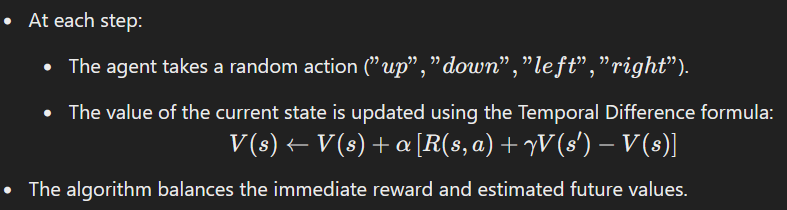

3. Visualization:

The final state-value function is plotted using a heatmap, where higher values correspond to states closer to the goal.

Value Trends:

    States closer to the goal (4,4)(4,4) have higher values, as the reward of 1010 becomes more accessible.
    Obstacles create regions of lower value, as they restrict movement.

Learning Behavior:

    The agent uses bootstrapping to estimate long-term rewards based on immediate feedback and future state values.
    Over multiple episodes, the value function converges to reflect the optimal policy.